# Downstream analysis
We create a vcf file containing small and structral variants annotated with their AF and predicted functional impact. Here we are going to go through how to explore those variants.

Let's start by visualizing structral variants to make sure that the callers did a good job.


I am going to


In [1]:
%%bash 
grep "cuteSV-25-8240662-DEL-0-1405" results/cuteSV/ERR5043144.hifi.pbmm2.phased.vcf

25	8240662	cuteSV-25-8240662-DEL-0-1405	AATGTCTGATTTTATTCTTTGGAAAGAATGATGCTAAAGCTGAAACTCCAGTACTTTGGCCACCTCATGTGAAGAGTTGACTCATTGGAAAAGACTCTGATGCTGGGAGGGATTGGGGGCAGGAGGAGAAGGGGATTACAGAGGATGAGATGGCTGGATGGCATCACCAACTCAATGGACATGGGTTTGGGTGGACTCCGGGAGTTGGTGATGGACAGGGAGGCCTGGCGTGCTGTGGTTCATGGGGTCAGGAAGAGTCAGACACAACTGAGCGACTGAACTGAACTGATTATGAATATGTCAAGTCCTTATTGCAAGAATTCCAGATAAGAAATATTGCCCTCATTTCAGATAGGAGGAAACTGAGGAAACTTCCCAAGGGTGATTTCACTGGGGAGCCACTAAACCTGGACTCCTTTCATTTCAACTGCTTTTCATGAGGCACCTGTGTGGTCTACCTGGTTCCATTAACTTCACTGTCTTTCTTATTGAGAGCCTGCCTTCCTAAGCAGAAAAATCAAGGAGGGAAATTAAAAGCACTTGTGAAGTCATTTTACCCATCACTGACTGCTGGGCGCTCCCTAAATAGAAGGATCTCGTATGTGTTTGCAAATGCTAATCCACTCTGGAGTCTTTCATTTTTAGAAAAAAGGGGTGCTGGGATCCATGAGCACTGAGATTCGGCTTCACTGTCATGTTCCTAAGCACACAGAAATCACACGTCTTTAGCTCTTTTGGTCTTCCTGGCCCTGCATGCAAAGGAGTTTGAAAACCTTCCAGAAGCTGCCACGTGCCATGATCAGCAGGAAGCTTTAGATTCTATGCAAGAACAGAAAATCAAGAGGCTTACACCGGCATGGTGAGTGAGGCTTTGTGGTCTTTCAGCAAGACTGTTTTCATATATATTTATAAAGTGCCCACTATACGCTGGGTACTGAGAATATAGAAATGATAACACCT

# Samplot
The variant of length(1405) starts at 8240662 and ends at 8242067. We are going to use samplot to visualize this variant. 
Plotting using our snakemake workflow is very simple. 

just run 'snakemake -j1 -p results/samplot/{sv\_type}\_{chrom}\_{start}\_{end}.png'

In [2]:
%%bash
snakemake -j1 -p results/samplot/DEL_25_8240662_8242067.png

Detecting duplicate sample names ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00


Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).
Complete log: .snakemake/log/2023-01-12T090325.490976.snakemake.log


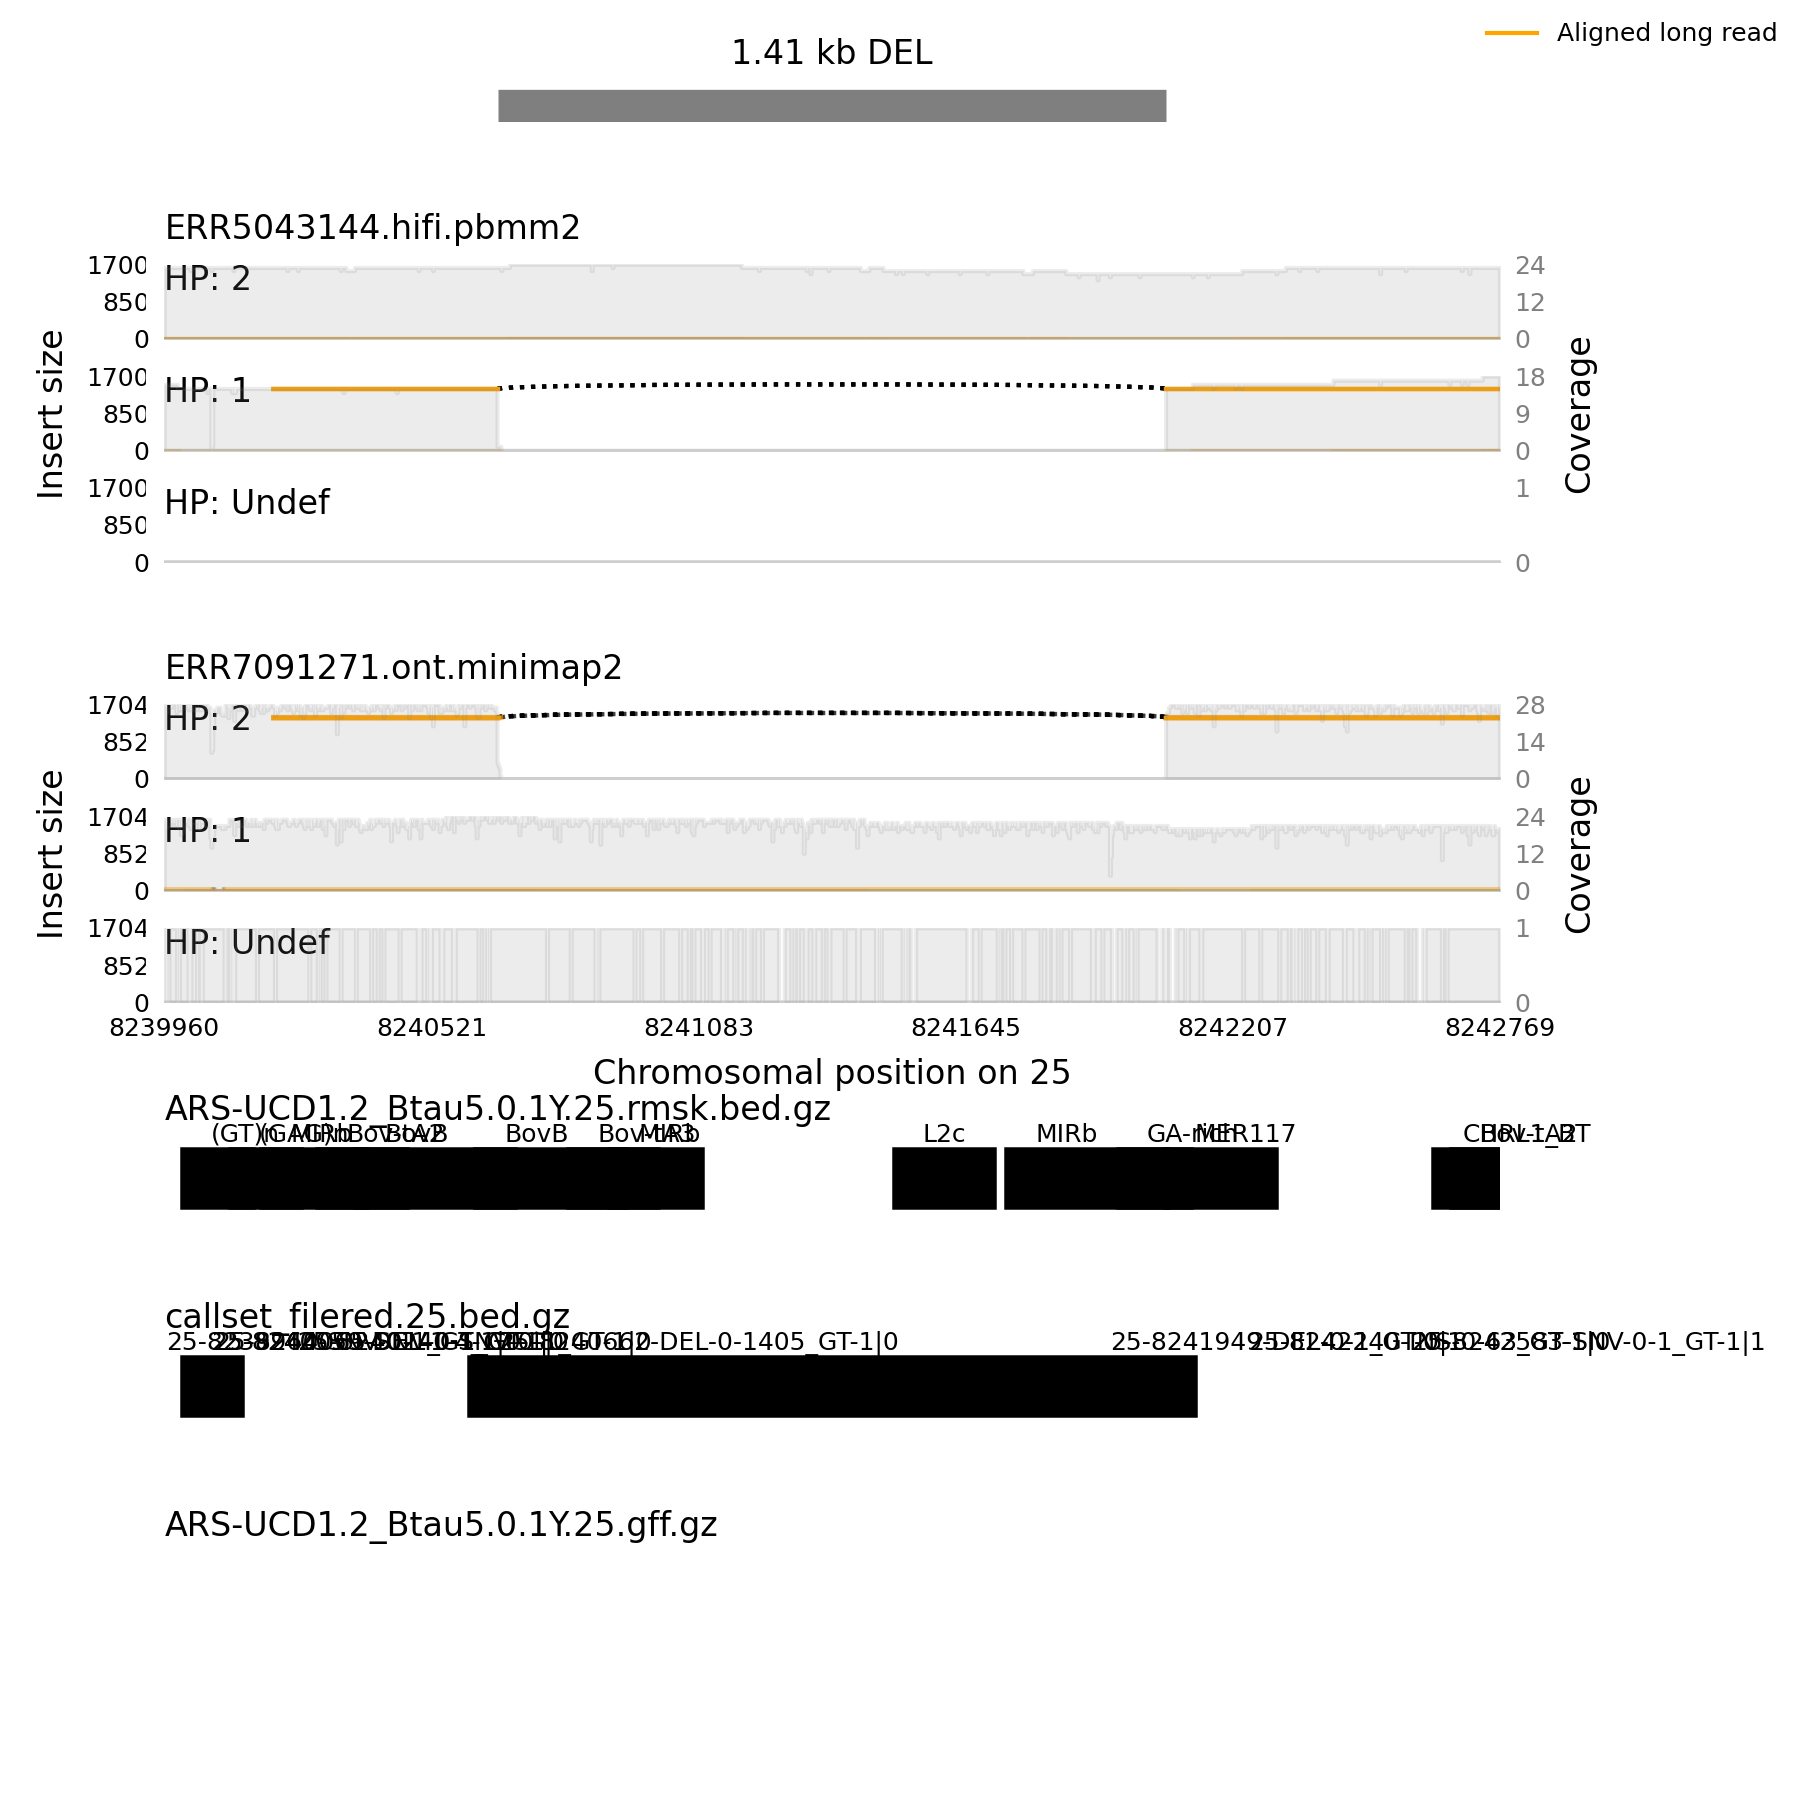

In [3]:
from IPython.display import Image
Image(filename='results/samplot/DEL_25_8240662_8242067.png') 

# Visualize SV Benchmark
Benchmarking SV is not an easy job because tools always disagree about the positions of breakpoints. Therefore, we can expect that some SV in our benchmarks tagged as FP while it was correct but the breakpoint wasnt matching.

Let's view a SV called by pbsv but was tagged as FP.


In [4]:
%%bash
grep "pbsv-25-9733349-DEL-0-663" results/pbsv/ERR5043144.hifi.pbmm2.phased.vcf

25	9733349	pbsv-25-9733349-DEL-0-663	TCTTTTTTTTTTTTTTTTTTTAAAGGCTTAAAATGTATTTTAATAAGTTCATGTTGCATTATTCATTTCTCAGAAAAACTTCAAAGGTATTAGGGACAAATCAAACATGGTACACCAATAAAAAATGCACAGCGTAACTACCTAAGATAGGCAAAGCTAAGAGCTACCGTCTGACATTCAGCATACAGCAACCCTGTTCTCAAGATTGTACTAGGCCTATCAAGAAAGCTGTGAATGGCAACATCACAGACACAAAAGGGCCATTTCTGGGTTGTCCTTACCCAAGAAAAAGATGGAGGCAAGTTTAACACAAGATTTTTTTAAAGATACACTAAATGAAAATCTCTAAGAGAAAATGTCTTCCTTGGGACATGAAAGGGTAATATATGGGACATAACAGAACCGTATGTATGTTGTCTGTGACCTCTGTGGACATGTGCCTGAATTCCCACCTGGGAGTGATTGGAACAGTGGGGCCAAGGTCATTGGGGGATGTTTGGTTTTTGTGGTATATGTGGCAGGATCTCTGGGGTGAGACAGTGCACTAAGTCGTGTCCGACTCTTGCGACCCCATGGACTGTAGCCTGCCAGGCTCCTCTGTCTATGGGATTCTCCAGGCAAGAATACTGGAGTGGGTTGCCATTTCCTTCTCCAGAAATCGAGT	T	.	PASS	ID=pbsv-25-9733349-DEL-0-663	GT	1|0


In [5]:
%%bash
snakemake -j1 -p results/samplot/DEL_25_9733349_9734012.png

Detecting duplicate sample names ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00


Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).
Complete log: .snakemake/log/2023-01-12T090330.052886.snakemake.log


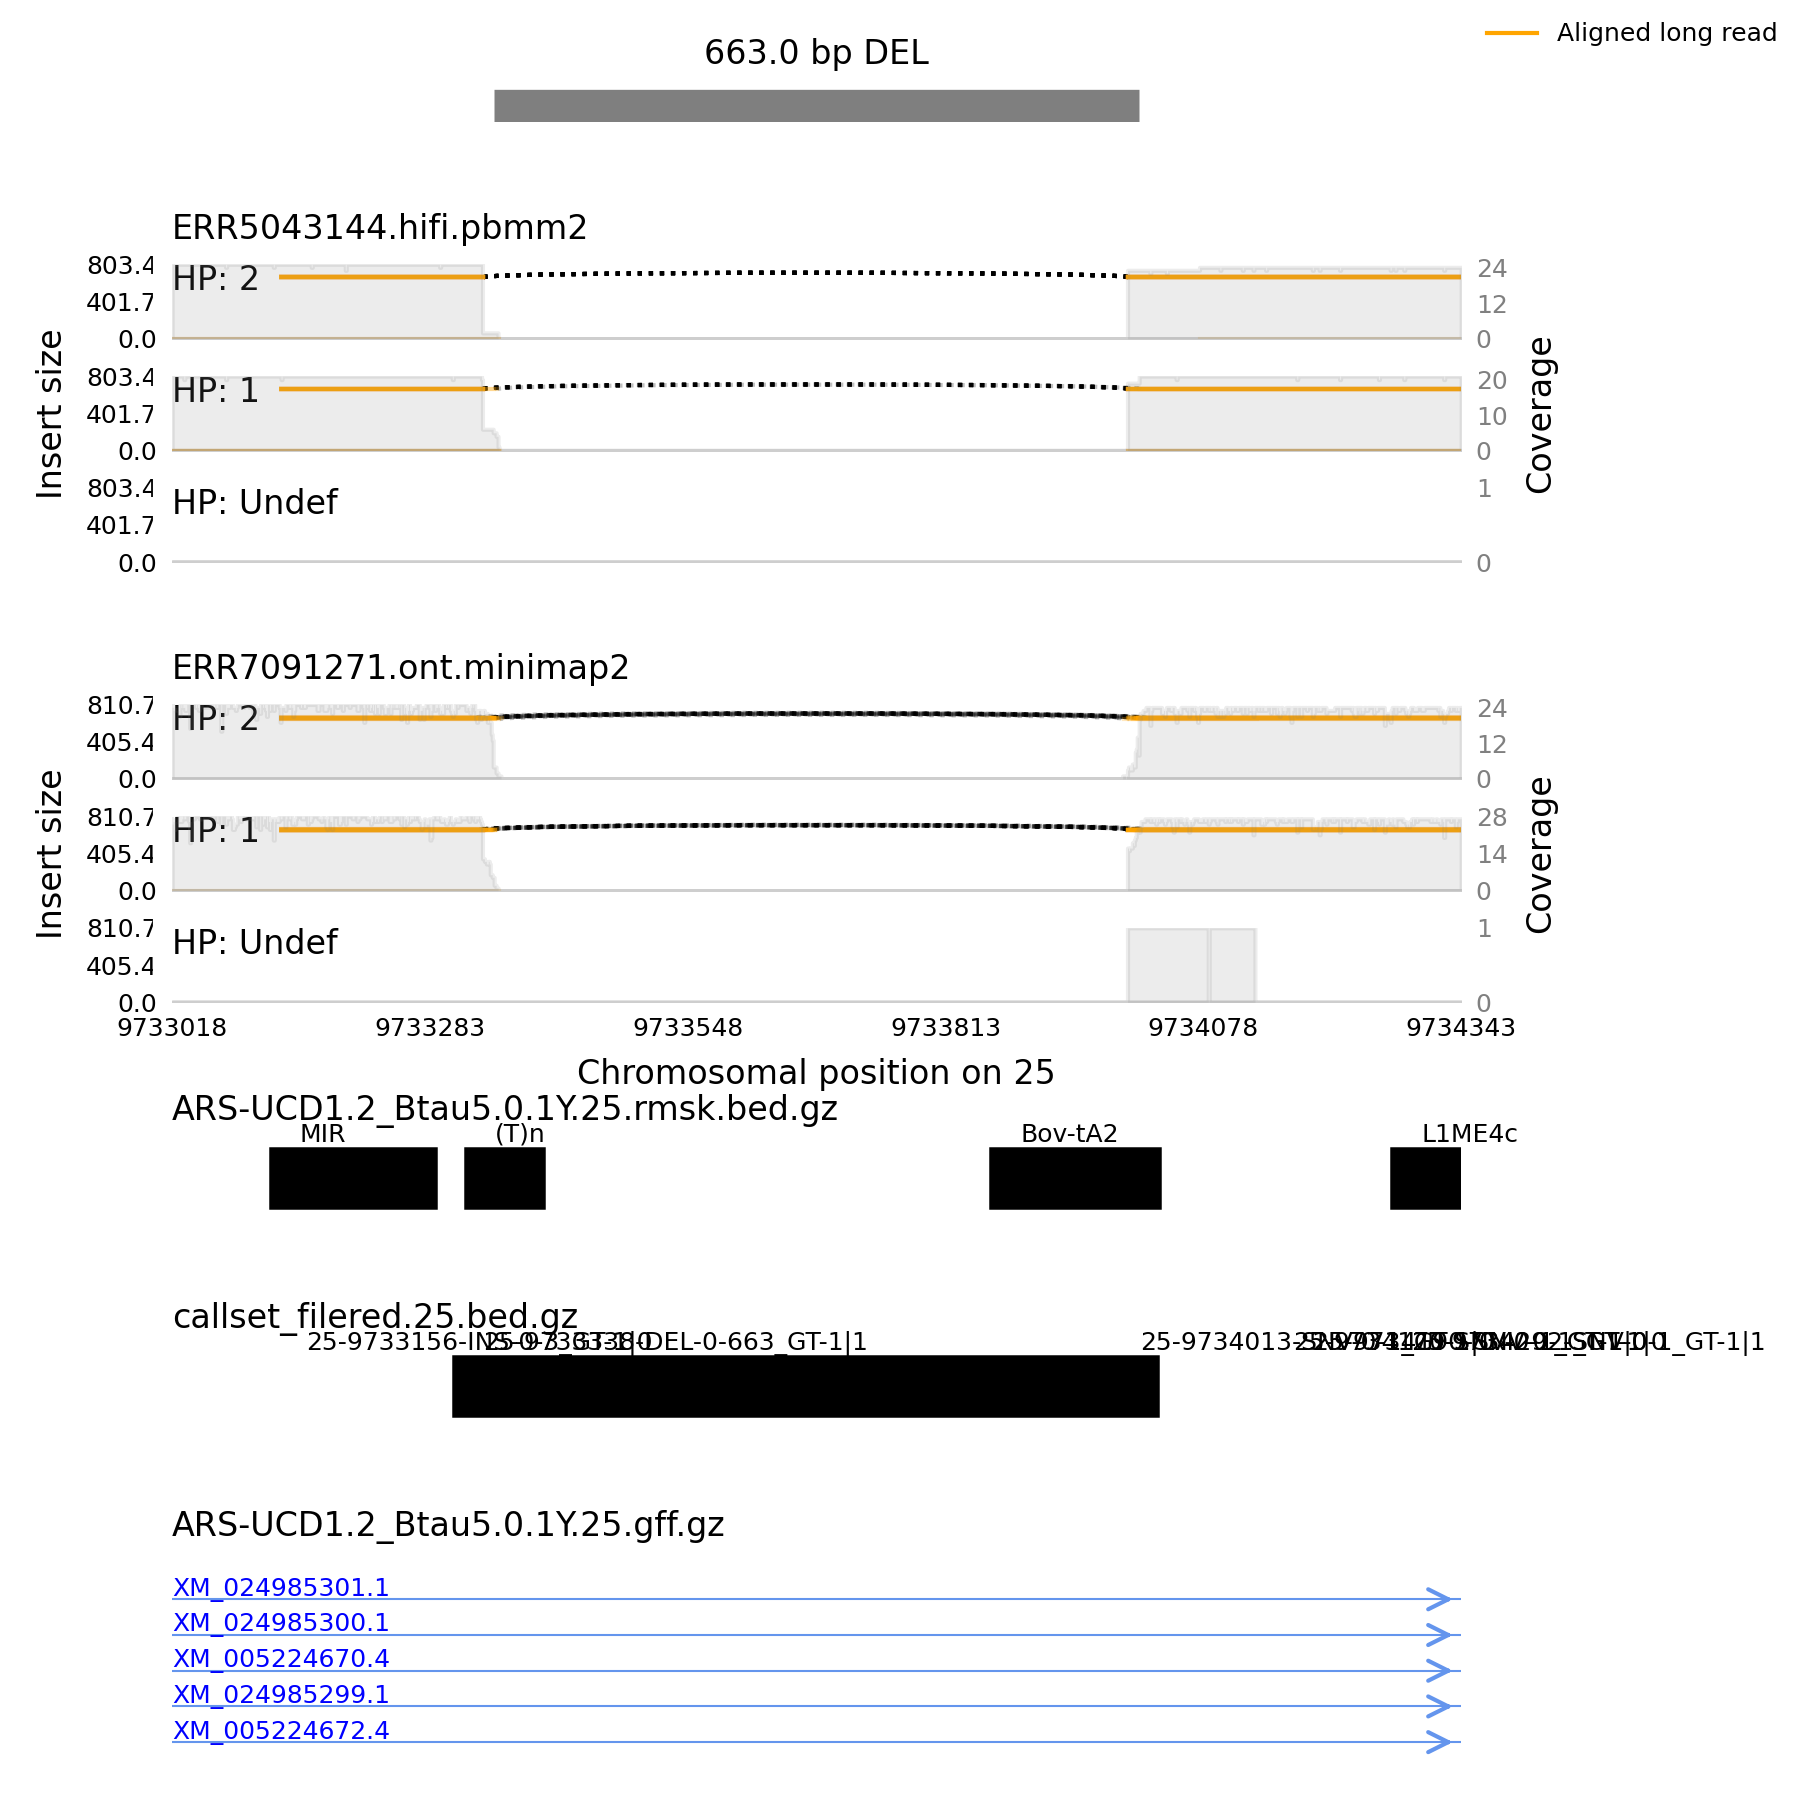

In [6]:
Image(filename='results/samplot/DEL_25_9733349_9734012.png') 

Looks like that SV is actually correct. Lesson here is that You have to visualize SV to make sure that everything is correct.

# Variant Effect predictor
We are going to use VEP to predict the effect of the variants. The following figgure summarizes the annotations produced by VEP. More information is available on their [website](https://uswest.ensembl.org/info/genome/variation/prediction/predicted_data.html)
![VEP](https://uswest.ensembl.org/info/genome/variation/prediction/consequences.jpg)

### Run VEP using snakemake
to get the output file for vep: replace the extnesion(".vcf.gz") of any compressed vcf file  with ".vep.vcf.gz".

for example: 

results/cuteSV/ERR7091271.ont.minimap2.phased.vcf.gz 

                will be

results/cuteSV/ERR7091271.ont.minimap2.phased.vep.vcf.gz 

In [7]:
%%bash 
snakemake -j4 --use-conda "results/cuteSV/ERR7091271.ont.minimap2.phased.vep.vcf.gz"

Detecting duplicate sample names ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00


Building DAG of jobs...
Your conda installation is not configured to use strict channel priorities. This is however crucial for having robust and correct environments (for details, see https://conda-forge.org/docs/user/tipsandtricks.html). Please consider to configure strict priorities by executing 'conda config --set channel_priority strict'.
Nothing to be done (all requested files are present and up to date).
Complete log: .snakemake/log/2023-01-12T090332.079937.snakemake.log


### View VEP report
Lets first, look at the summary results they produced. 

1. Browse the folders using the panel on the left to "results/cuteSV/"

2. Download the report "ERR7091271.ont.minimap2.phased.vep.html": right click on the file then click downloand

### Let's visualize a high impact variant
We need first to get the coordinates of a high impact variant to visualize

In [8]:
%%bash
zgrep "coding_sequence_variant"  results/cuteSV/ERR7091271.ont.minimap2.phased.vep.vcf.gz

25	2585287	cuteSV-25-2585287-DEL-0-396	AGCCCTGTCTGTAGCCAGAGCCCGGCCCCAGCGCTCAGTATGACCTGTCCGGGGCCAGGGCCGCCCTCCTCCTGGCTGTGACCCAGGGCCGGCTGGGGGCCCAGCACGATGTGGAGGCGCTGGAGGGCTTGTGCCAGGCCCTGGGCTTCGAGACCACCCTGAGGACAGACCCTACAGCCCAGGTGAGGGGAAGCCCAGAACCTCTGAAGGTCCTCTGAAGGAAGGGTACCCCCCACCCAGACCCTGGGGACTCTGTCCGGGGCCTCTTACCAATTGTGGGCAGAAATGCACCCCCAGCCTCCCTGTTGCATGCATGCATCTATGCGAACCCACTTCCCTGCTCCTGCAAGTCCAGTCTCCCGGGCCGCTGCCACCTCTCACGCCGGCCCCTGCTCAA	A	.	PASS	ID=cuteSV-25-2585287-DEL-0-396;CSQ=-|splice_donor_variant&splice_acceptor_variant&coding_sequence_variant&intron_variant|HIGH|CASP16|ENSBTAG00000021407|Transcript|ENSBTAT00000048500|protein_coding|5/9|4-5/8||||||||||1||VGNC||,-|downstream_gene_variant|MODIFIER||ENSBTAG00000052480|Transcript|ENSBTAT00000067899|lncRNA|||||||||||4958|-1||||,-|splice_donor_variant&splice_acceptor_variant&coding_sequence_variant&intron_variant|HIGH|CASP16|ENSBTAG00000021407|Transcript|ENSBTAT00000075295|protein_coding|4/8|3-4/7||||||||||1||VGNC||	GT	1|0
25	37771113	cute

Let's visualize the first deletion(396bp) starting from 2585287 to 2585683 on chromsome

In [9]:
%%bash
snakemake -j1 -p results/samplot/DEL_25_2585287_2585683.png

Detecting duplicate sample names ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00


Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).
Complete log: .snakemake/log/2023-01-12T090338.041397.snakemake.log


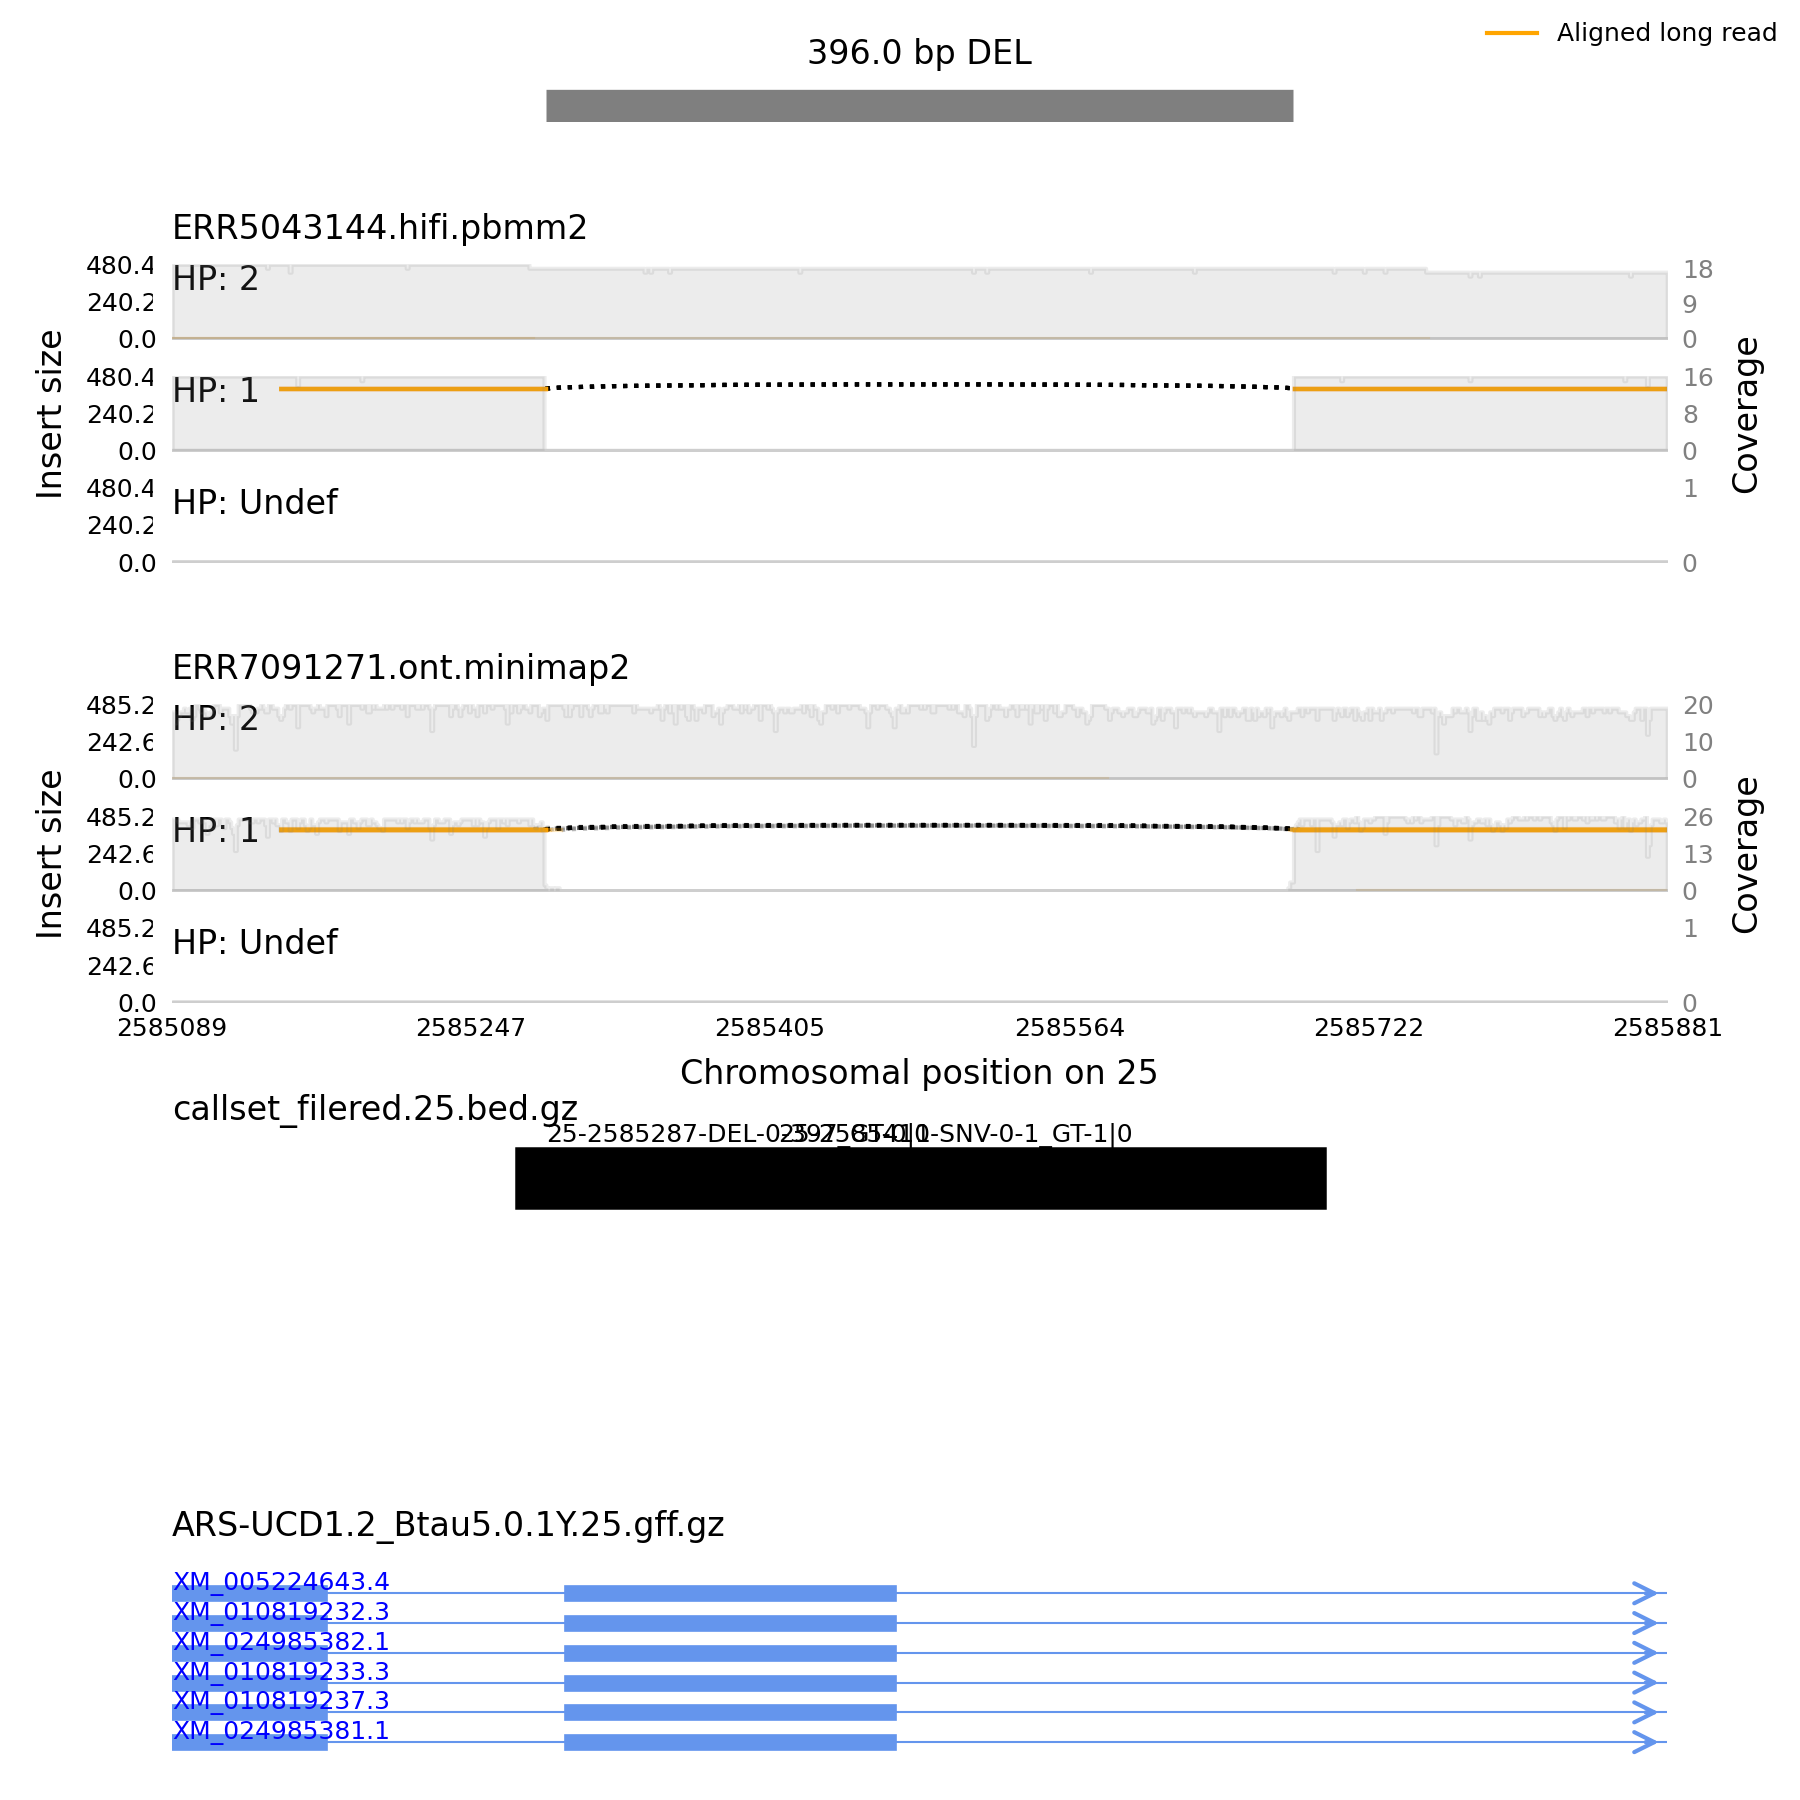

In [10]:
Image(filename='results/samplot/DEL_25_2585287_2585683.png')

## Population Frequency analysis
We calculated the AF for our VCFs in 10 samples. Here, I am providing a vcf file produced using the sample workflow but I ran the population genotyper against 428 samples. you will find the result file "final.vep.vcf.bgz" contianing all the vairants and "final.SV.vep.vcf.bgz" containing only the SV. The following table describes the metadata tagged for each variant.


| Metadata      | Description |
| -- |:-----------:|
| AC | Allele count in genotypes|
| AC_Het | Allele counts in homozygous genotypes|
| AC_Hom | Allele counts in heterozygous genotypes|
| AC_Hemi | Allele counts in hemizygous genotypes|
| AF | Allele frequency |
| MAF | Minor Allele frequency |
| NS | Number of samples with data   |
| AN | Total number of alleles in called genotypes |
| HWE | Hardy-Weinberg equilibrium |
| ExcHet | Test excess heterozygosity; 1=good, 0=bad |


Let's first check a file called "samples.csv" containing breed information of the 428 animal. The following command print the first 10 animals

In [11]:
%%bash
cat samples.csv |head|tr -s ',' $'\t' | ../tools/prettytable 3 

┌──────────────┬────────────────┬─────────┐
│BioSample     │CompositeBreed  │Cohort   │
├──────────────┼────────────────┼─────────┤
│SAMN10940442  │Angus           │taurus   │
│SAMN05788483  │Angus           │taurus   │
│SAMN05788486  │Angus           │taurus   │
│SAMN10940466  │Angus           │taurus   │
│SAMN02671595  │Holstein        │taurus   │
│SAMN05788491  │Brahman         │indicus  │
│SAMN10940495  │Angus           │taurus   │
│SAMN10940498  │Angus           │taurus   │
│SAMN10940540  │Hereford        │taurus   │
└──────────────┴────────────────┴─────────┘


The commands below count the number of samples per breed

In [12]:
%%bash
cut -f2 -d, samples.csv |sort |uniq -c| awk '{print $2"\t"$1}' |sort -k2,2nr > tmp
cat <(echo -e "Breed\tcount") tmp | ../tools/prettytable 2

┌────────────────────────────┬───────┐
│Breed                       │count  │
├────────────────────────────┼───────┤
│Holstein                    │81     │
│taurus                      │66     │
│Yak                         │33     │
│Cross-Holstein-Jersey       │31     │
│Jersey                      │31     │
│GermanBlackPied             │29     │
│Angus                       │21     │
│Simmental                   │13     │
│BrownSwiss                  │11     │
│Brahman                     │7      │
│Cross-Jersey-Holstein       │5      │
│Gelbvieh                    │5      │
│Hereford                    │5      │
│Charolais                   │4      │
│RedAngus                    │4      │
│Shorthorn                   │4      │
│Yakut                       │4      │
│Braunvieh                   │3      │
│MaineAnjou                  │3      │
│Romagnola                   │3      │
│Semien                      │3      │
│Beefmaster                  │2      │
│Braunveih               

### Find Rare variants

Bcftools is very helpful in filtering vcf files using the variants metadata. For example, We can query the novel varaints using the following command

In [13]:
%%bash
bcftools view  -Q 0.001 final.SV.vep.vcf.bgz  | grep -vP "^#"  |head -n 4

25	8572	cuteSV-25-8572-INS-0-3469	G	GCGTGTGTGTGTGCGTCTGTCTCGGAATCTTCATGTATTTCTGCCTCTGTATCTCCTGACAGCCGCGCACCTGCCGTTCGTCTGGCCCGGGCCTCTCCCAGGTGCTCTGGCTCTGGCTGAGAGCTTGCACAGAACGGCTGTCTCCCACTTTGCGTGGGTTCGTGCGAGTGTCTGTGTGTCTGTCTGTGTGCCTGCCTGTGGCTCATCTGCTCTCTCAGGAATGTCGAGGGGAGGGCAGCGTGGGGGCAAAGGGGCGTCGGTAGTGCGAAGGGCGGGGCTGAGGCGCTCAGTCGGCTGCGCCTCCTGGCTTCCAGTGGGTTTGGGCACGGACAGGTGCCGAGAGCAGGGCACTCAAGTTTCGCTGCGCCTAGGCCCGCAGGAGGTTCAGAGGCCCCTGGGCCGCGGGGGTTGGGACGGCGGGCCCCGAAAGACAGATACCTCCGGGGCCGCGCGGGCCTGAGAAGCGAAAGGGATGCGGGGAGGCCCCGGCTCAGCGGCCCGGCCGGGTCTGGGTGCCCGGGGGTGGGAGGGCGCCGGGGCCTCCGCACCCCTCAGCCCAGCCCCCAGGCCCGCACGCACGCATGCACGCATGCGCCCTCCCGGTCAATGGGGTCCTCGAAGCCCCTCGGGCCCAGGCCCGGCCAGGTGCTGCTGGTCTGGTGTTGGCGGTGTTAGGGGCGGGCGGCGTCAGCAGGCTGGAGTCCGGTCGCGGGTCATGCGGCTCAAGTGCAGCACGCCCCCGAAGAGAGGTGCGCGGCCCATTGGCCCGACCTGCAGGTCGGAGCGAAAGGAGAGAGCGACGCAAAGCTCTTGAGACCTTGCGCCAACCCGCCTCAATCTCCGGCTGTATCAGCCTGAAGGCTCCCGATCTCGTCTGATCTCGGAAGCTAAGCAGGGTCCTAAGCAGGTCGGGCCTGGTTAGTATCTTGGATAAGGAGACCACCTGGGAATCCCGGGTGCTCGA

### Finding common variants
on the other hand we can select the most common variants

In [14]:
%%bash
bcftools view  -q 0.9 final.SV.vep.vcf.bgz  | grep -vP "^#"  |head -n 4

25	10416283	cuteSV-25-10416283-DEL-0-54	TGGGGGTTGGGGGGAGACAAGGAATAGATTGATTCCATGGGTCCAAAGGGGGGGG	T	.	PASS	AC=776;AC_Hemi=0;AC_Het=16;AC_Hom=760;AF=0.906542;AK=61,30;AN=856;ExcHet=1;HWE=1.28751e-33;ID=cuteSV-25-10416283-DEL-0-54;MA=0;MAF=0.0934579;NS=428;UK=91;CSQ=-|intron_variant|MODIFIER|TXNDC11|ENSBTAG00000014823|Transcript|ENSBTAT00000019741|protein_coding||2/11||||||||||-1||VGNC||0.63	GT	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	0/0	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	0/0	1/1	1/1	0/0	0/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	0/0	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	0/0	1/1	0/0	0/0	1/1	1/1	0/0	1/1	1/1	0/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	0/0	1/1	1/1	1/1	1/1	1/1	0/1	1/1	1/1	1/1	1/1	1/1	1/1	0/0	1/1	1/1	1/1	1/1	0/1	1/1	1/1	1/1	1/1	1/1	0/0	1/1	1/1	1/1	0/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	0/0	1/1	0/0	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	1/1	0/0	1/

# Hail
Although bcftools is very helpful and fast but it is hard to do complex tasks with it. Here we are suggesting using Hail to be able explore the population genotyping results and get meaningful results. Hail is a python library for genomic data expoloration. It creates a matrix table for vcf files which is very similar to R dataframes.

So let's do some coding by intializing Hail engine

In [15]:
import hail as hl
hl.init()
from hail.plot import show
from pprint import pprint
hl.plot.output_notebook()

2023-01-12 09:03:45.993 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Running on Apache Spark version 3.1.3
SparkUI available at http://c6-62.farm.cse.ucdavis.edu:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.107-2387bb00ceee
LOGGING: writing to /home/mshokrof/workshop_12Jan_2023/SV_calling_LR/hail-20230112-0903-0.2.107-2387bb00ceee.log


Loading BokehJS ...

Now we are going to load the vcf and samples information to create Hail Matrix table

In [16]:
ref="/home/mshokrof/workshop_12Jan_2023_data/ARS-UCD1.2_Btau5.0.1Y.25.fa"
index="/home/mshokrof/workshop_12Jan_2023_data/ARS-UCD1.2_Btau5.0.1Y.25.fa.fai"
vcf="final.vep.vcf.bgz"
samplesInfo="samples.csv"
hlRef=hl.ReferenceGenome.from_fasta_file("ARSUCD",ref,index)

mt = hl.import_vcf(vcf,reference_genome=hlRef)
table = (hl.import_table('samples.csv', impute=True,delimiter=",")
         .key_by('BioSample'))
mt = mt.annotate_cols(breed = table[mt.s])

2023-01-12 09:03:55.840 Hail: INFO: wrote table with 429 rows in 1 partition to /tmp/persist_tableWzfngSiEQt
2023-01-12 09:03:57.129 Hail: INFO: Reading table to impute column types
2023-01-12 09:03:58.085 Hail: INFO: Finished type imputation
  Loading field 'BioSample' as type str (imputed)
  Loading field 'CompositeBreed' as type str (imputed)
  Loading field 'Cohort' as type str (imputed)


Lets see how the hail matrix table is organized

In [17]:
mt.rows().show(5)

2023-01-12 09:03:58.368 Hail: INFO: scanning VCF for sortedness...
2023-01-12 09:04:00.906 Hail: INFO: Coerced sorted VCF - no additional import work to do


+---------------+------------+------+-----------+----------+----------------+
| locus         | alleles    | rsid |      qual | filters  | info.AF        |
+---------------+------------+------+-----------+----------+----------------+
| locus<ARSUCD> | array<str> | str  |   float64 | set<str> | array<float64> |
+---------------+------------+------+-----------+----------+----------------+
| 25:241        | ["C","G"]  | NA   | -1.00e+01 | {}       | [7.71e-02]     |
| 25:320        | ["G","A"]  | NA   | -1.00e+01 | {}       | [8.06e-02]     |
| 25:343        | ["T","A"]  | NA   | -1.00e+01 | {}       | [8.06e-02]     |
| 25:465        | ["G","A"]  | NA   | -1.00e+01 | {}       | [8.29e-02]     |
| 25:474        | ["T","A"]  | NA   | -1.00e+01 | {}       | [8.29e-02]     |
+---------------+------------+------+-----------+----------+----------------+

+---------+--------------+---------+------------+---------+--------------+
| info.UK | info.AK      | info.MA | info.ID    | info.AN | info.AC      |
+---------+--------------+---------+------------+---------+--------------+
|   int32 | array<int32> |   int32 | array<str> |   int32 | array<int32> |
+---------+--------------+---------+------------+---------+--------------+
|       0 | [0,0]        |       0 | NA         |     856 | [66]         |
|       0 | [0,0]        |       0 | NA         |     856 | [69]         |
|       0 | [0,0]        |       0 | NA         |     856 | [69]         |
|       0 | [0,0]        |       0 | NA         |     856 | [71]         |
|       0 | [0,0]        |       0 | NA         |     856 | [71]         |
+---------+--------------+---------+------------+---------+--------------+

+---------+--------------+--------------+--------------+----------+
| info.NS | info.AC_Hom  | info.AC_Het  | info.AC_Hemi | info.MAF |
+---------+--------------+--------------+--------------+----------+
|   int32 | array<int32> | array<int32> | array<int32> |  float64 |
+---------+--------------+--------------+--------------+----------+
|     428 | [64]         | [2]          | [0]          | 7.71e-02 |
|     428 | [64]         | [5]          | [0]          | 8.06e-02 |
|     428 | [64]         | [5]          | [0]          | 8.06e-02 |
|     428 | [68]         | [3]          | [0]          | 8.29e-02 |
|     428 | [68]         | [3]          | [0]          | 8.29e-02 |
+---------+--------------+--------------+--------------+----------+

+----------------+----------------+
| info.HWE       | info.ExcHet    |
+----------------+----------------+
| array<float64> | array<float64> |
+----------------+----------------+
| [0.00e+00]     | [1.00e+00]     |
| [6.15e-43]     | [1.00e+00]     |
| [6.15e-43]     | [1.00e+00]     |
| [0.00e+00]     | [1.00e+00]     |
| [0.00e+00]     | [1.00e+00]     |
+----------------+----------------+

+--------------------------------------------------------+
| info.CSQ                                               |
+--------------------------------------------------------+
| array<str>                                             |
+--------------------------------------------------------+
| ["G|intergenic_variant|MODIFIER|||||||||||||||||||||"] |
| ["A|intergenic_variant|MODIFIER|||||||||||||||||||||"] |
| ["A|intergenic_variant|MODIFIER|||||||||||||||||||||"] |
| ["A|intergenic_variant|MODIFIER|||||||||||||||||||||"] |
| ["A|intergenic_variant|MODIFIER|||||||||||||||||||||"] |
+--------------------------------------------------------+
showing top 5 rows

In [18]:
mt.GT.show(5)

,,,,,
,,'SAMEA19309918','SAMEA19320418','SAMEA2821387','SAMEA32988418'
locus,alleles,GT,GT,GT,GT
locus<ARSUCD>,array<str>,call,call,call,call
25:241,"[""C"",""G""]",0/0,0/0,0/0,0/0
25:320,"[""G"",""A""]",0/0,0/0,0/0,0/0
25:343,"[""T"",""A""]",0/0,0/0,0/0,0/0
25:465,"[""G"",""A""]",0/0,0/0,0/0,0/0
25:474,"[""T"",""A""]",0/0,0/0,0/0,0/0


In [19]:
samplesPercohort=mt.aggregate_cols(hl.agg.counter(mt.breed.Cohort))
print(samplesPercohort)

{'bosoutgroup': 36, 'indicus': 24, 'taurus': 368}


### Stratify population allele frequency
Here we are trying to answer questions like which variants are frequent in the Indicus breeds only. We are going to calculate allele frequencies per cohort.


In [20]:
mt=mt.annotate_rows(AF_indicus=hl.agg.filter(mt.breed.Cohort =="indicus",
                                     hl.agg.sum(mt.GT.n_alt_alleles())
                                     / samplesPercohort["indicus"]*2 ))
mt=mt.annotate_rows(AF_taurus=hl.agg.filter(mt.breed.Cohort =="taurus",
                                     hl.agg.sum(mt.GT.n_alt_alleles())
                                     / samplesPercohort["taurus"]*2 ))
mt=mt.annotate_rows(AF_bosoutgroup=hl.agg.filter(mt.breed.Cohort =="bosoutgroup",
                                     hl.agg.sum(mt.GT.n_alt_alleles())
                                     / samplesPercohort["bosoutgroup"]*2 ))
mt.rows().show(5)

+---------------+------------+------+-----------+----------+----------------+
| locus         | alleles    | rsid |      qual | filters  | info.AF        |
+---------------+------------+------+-----------+----------+----------------+
| locus<ARSUCD> | array<str> | str  |   float64 | set<str> | array<float64> |
+---------------+------------+------+-----------+----------+----------------+
| 25:241        | ["C","G"]  | NA   | -1.00e+01 | {}       | [7.71e-02]     |
| 25:320        | ["G","A"]  | NA   | -1.00e+01 | {}       | [8.06e-02]     |
| 25:343        | ["T","A"]  | NA   | -1.00e+01 | {}       | [8.06e-02]     |
| 25:465        | ["G","A"]  | NA   | -1.00e+01 | {}       | [8.29e-02]     |
| 25:474        | ["T","A"]  | NA   | -1.00e+01 | {}       | [8.29e-02]     |
+---------------+------------+------+-----------+----------+----------------+

+---------+--------------+---------+------------+---------+--------------+
| info.UK | info.AK      | info.MA | info.ID    | info.AN | info.AC      |
+---------+--------------+---------+------------+---------+--------------+
|   int32 | array<int32> |   int32 | array<str> |   int32 | array<int32> |
+---------+--------------+---------+------------+---------+--------------+
|       0 | [0,0]        |       0 | NA         |     856 | [66]         |
|       0 | [0,0]        |       0 | NA         |     856 | [69]         |
|       0 | [0,0]        |       0 | NA         |     856 | [69]         |
|       0 | [0,0]        |       0 | NA         |     856 | [71]         |
|       0 | [0,0]        |       0 | NA         |     856 | [71]         |
+---------+--------------+---------+------------+---------+--------------+

+---------+--------------+--------------+--------------+----------+
| info.NS | info.AC_Hom  | info.AC_Het  | info.AC_Hemi | info.MAF |
+---------+--------------+--------------+--------------+----------+
|   int32 | array<int32> | array<int32> | array<int32> |  float64 |
+---------+--------------+--------------+--------------+----------+
|     428 | [64]         | [2]          | [0]          | 7.71e-02 |
|     428 | [64]         | [5]          | [0]          | 8.06e-02 |
|     428 | [64]         | [5]          | [0]          | 8.06e-02 |
|     428 | [68]         | [3]          | [0]          | 8.29e-02 |
|     428 | [68]         | [3]          | [0]          | 8.29e-02 |
+---------+--------------+--------------+--------------+----------+

+----------------+----------------+
| info.HWE       | info.ExcHet    |
+----------------+----------------+
| array<float64> | array<float64> |
+----------------+----------------+
| [0.00e+00]     | [1.00e+00]     |
| [6.15e-43]     | [1.00e+00]     |
| [6.15e-43]     | [1.00e+00]     |
| [0.00e+00]     | [1.00e+00]     |
| [0.00e+00]     | [1.00e+00]     |
+----------------+----------------+

+--------------------------------------------------------+------------+
| info.CSQ                                               | AF_indicus |
+--------------------------------------------------------+------------+
| array<str>                                             |    float64 |
+--------------------------------------------------------+------------+
| ["G|intergenic_variant|MODIFIER|||||||||||||||||||||"] |   0.00e+00 |
| ["A|intergenic_variant|MODIFIER|||||||||||||||||||||"] |   0.00e+00 |
| ["A|intergenic_variant|MODIFIER|||||||||||||||||||||"] |   0.00e+00 |
| ["A|intergenic_variant|MODIFIER|||||||||||||||||||||"] |   0.00e+00 |
| ["A|intergenic_variant|MODIFIER|||||||||||||||||||||"] |   0.00e+00 |
+--------------------------------------------------------+------------+

+-----------+----------------+
| AF_taurus | AF_bosoutgroup |
+-----------+----------------+
|   float64 |        float64 |
+-----------+----------------+
|  3.80e-02 |       3.28e+00 |
|  5.43e-02 |       3.28e+00 |
|  5.43e-02 |       3.28e+00 |
|  6.52e-02 |       3.28e+00 |
|  6.52e-02 |       3.28e+00 |
+-----------+----------------+
showing top 5 rows

Now we calculated startified AF per cohort lets find the frequent variants in Indicus samples

In [21]:
indicusFrequent=mt.filter_rows(mt.AF_indicus > 0.7)
indicusFrequent.rows().show()

+---------------+-------------------------+---------------------------+
| locus         | alleles                 | rsid                      |
+---------------+-------------------------+---------------------------+
| locus<ARSUCD> | array<str>              | str                       |
+---------------+-------------------------+---------------------------+
| 25:4213       | ["TTTCTTTTCTTTTCT","T"] | "cuteSV-25-4213-DEL-0-14" |
| 25:4424       | ["C","T"]               | NA                        |
| 25:4447       | ["T","C"]               | NA                        |
| 25:7374       | ["T","G"]               | NA                        |
| 25:8446       | ["T","C"]               | NA                        |
| 25:8579       | ["TGTGTGTGTGTGTGT","T"] | "cuteSV-25-8579-DEL-0-14" |
| 25:8617       | ["C","T"]               | NA                        |
| 25:8621       | ["A","G"]               | NA                        |
| 25:8725       | ["G","C"]               | NA                        |
| 25:8832       | ["G","C"]               | NA                        |
+---------------+-------------------------+---------------------------+

+-----------+----------+----------------+---------+--------------+---------+
|      qual | filters  | info.AF        | info.UK | info.AK      | info.MA |
+-----------+----------+----------------+---------+--------------+---------+
|   float64 | set<str> | array<float64> |   int32 | array<int32> |   int32 |
+-----------+----------+----------------+---------+--------------+---------+
| -1.00e+01 | {}       | [6.07e-02]     |      26 | [0,26]       |       0 |
| -1.00e+01 | {}       | [7.24e-02]     |       0 | [0,0]        |       0 |
| -1.00e+01 | {}       | [7.24e-02]     |       0 | [0,0]        |       0 |
| -1.00e+01 | {}       | [1.17e-01]     |      18 | [3,15]       |       0 |
| -1.00e+01 | {}       | [1.99e-01]     |       0 | [0,0]        |       0 |
| -1.00e+01 | {}       | [2.17e-01]     |     301 | [301,0]      |       0 |
| -1.00e+01 | {}       | [2.17e-01]     |     301 | [301,0]      |       0 |
| -1.00e+01 | {}       | [2.17e-01]     |     301 | [301,0]      |       0 |
| -1.00e+01 | {}       | [2.23e-01]     |       0 | [0,0]        |       0 |
| -1.00e+01 | {}       | [2.20e-01]     |      21 | [4,0]        |       0 |
+-----------+----------+----------------+---------+--------------+---------+

+-----------------------------+---------+--------------+---------+
| info.ID                     | info.AN | info.AC      | info.NS |
+-----------------------------+---------+--------------+---------+
| array<str>                  |   int32 | array<int32> |   int32 |
+-----------------------------+---------+--------------+---------+
| ["cuteSV-25-4213-DEL-0-14"] |     856 | [52]         |     428 |
| NA                          |     856 | [62]         |     428 |
| NA                          |     856 | [62]         |     428 |
| NA                          |     856 | [100]        |     428 |
| NA                          |     856 | [170]        |     428 |
| ["cuteSV-25-8579-DEL-0-14"] |     856 | [186]        |     428 |
| NA                          |     856 | [186]        |     428 |
| NA                          |     856 | [186]        |     428 |
| NA                          |     856 | [191]        |     428 |
| NA                          |     856 | [188]        |     428 |
+-----------------------------+---------+--------------+---------+

+--------------+--------------+--------------+----------+----------------+
| info.AC_Hom  | info.AC_Het  | info.AC_Hemi | info.MAF | info.HWE       |
+--------------+--------------+--------------+----------+----------------+
| array<int32> | array<int32> | array<int32> |  float64 | array<float64> |
+--------------+--------------+--------------+----------+----------------+
| [14]         | [38]         | [0]          | 6.07e-02 | [3.53e-04]     |
| [24]         | [38]         | [0]          | 7.24e-02 | [1.04e-07]     |
| [24]         |

We can easily get the ids of the common variants

In [22]:
indicusFrequent.rows().rsid.collect()[:10]

['cuteSV-25-4213-DEL-0-14',
 None,
 None,
 None,
 None,
 'cuteSV-25-8579-DEL-0-14',
 None,
 None,
 None,
 None]

Similarily we find common variants for the Holstein breed only.

In [23]:
numSamples=mt.aggregate_cols(hl.agg.filter(mt.breed.CompositeBreed == "Holstein" ,hl.agg.count()))
mt=mt.annotate_rows(AF_Holstein=hl.agg.filter(mt.breed.CompositeBreed =="Holstein",
                                     hl.agg.sum(mt.GT.n_alt_alleles())
                                     / numSamples*2 ))

mt.filter_rows(mt.AF_Holstein > 0.8).rows().show()

+---------------+-------------------------+---------------------------+
| locus         | alleles                 | rsid                      |
+---------------+-------------------------+---------------------------+
| locus<ARSUCD> | array<str>              | str                       |
+---------------+-------------------------+---------------------------+
| 25:8327       | ["A","G"]               | NA                        |
| 25:8446       | ["T","C"]               | NA                        |
| 25:8579       | ["TGTGTGTGTGTGTGT","T"] | "cuteSV-25-8579-DEL-0-14" |
| 25:8617       | ["C","T"]               | NA                        |
| 25:8621       | ["A","G"]               | NA                        |
| 25:8725       | ["G","C"]               | NA                        |
| 25:8832       | ["G","C"]               | NA                        |
| 25:8890       | ["G","C"]               | NA                        |
| 25:9041       | ["G","A"]               | NA                        |
| 25:9042       | ["G","C"]               | NA                        |
+---------------+-------------------------+---------------------------+

+-----------+----------+----------------+---------+--------------+---------+
|      qual | filters  | info.AF        | info.UK | info.AK      | info.MA |
+-----------+----------+----------------+---------+--------------+---------+
|   float64 | set<str> | array<float64> |   int32 | array<int32> |   int32 |
+-----------+----------+----------------+---------+--------------+---------+
| -1.00e+01 | {}       | [1.82e-01]     |       0 | [0,0]        |       0 |
| -1.00e+01 | {}       | [1.99e-01]     |       0 | [0,0]        |       0 |
| -1.00e+01 | {}       | [2.17e-01]     |     301 | [301,0]      |       0 |
| -1.00e+01 | {}       | [2.17e-01]     |     301 | [301,0]      |       0 |
| -1.00e+01 | {}       | [2.17e-01]     |     301 | [301,0]      |       0 |
| -1.00e+01 | {}       | [2.23e-01]     |       0 | [0,0]        |       0 |
| -1.00e+01 | {}       | [2.20e-01]     |      21 | [4,0]        |       0 |
| -1.00e+01 | {}       | [2.93e-01]     |      59 | [62,2]       |       0 |
| -1.00e+01 | {}       | [3.73e-01]     |     132 | [102,24]     |       0 |
| -1.00e+01 | {}       | [3.73e-01]     |     132 | [102,24]     |       0 |
+-----------+----------+----------------+---------+--------------+---------+

+-----------------------------+---------+--------------+---------+
| info.ID                     | info.AN | info.AC      | info.NS |
+-----------------------------+---------+--------------+---------+
| array<str>                  |   int32 | array<int32> |   int32 |
+-----------------------------+---------+--------------+---------+
| NA                          |     856 | [156]        |     428 |
| NA                          |     856 | [170]        |     428 |
| ["cuteSV-25-8579-DEL-0-14"] |     856 | [186]        |     428 |
| NA                          |     856 | [186]        |     428 |
| NA                          |     856 | [186]        |     428 |
| NA                          |     856 | [191]        |     428 |
| NA                          |     856 | [188]        |     428 |
| NA                          |     856 | [251]        |     428 |
| NA                          |     856 | [319]        |     428 |
| NA                          |     856 | [319]        |     428 |
+-----------------------------+---------+--------------+---------+

+--------------+--------------+--------------+----------+----------------+
| info.AC_Hom  | info.AC_Het  | info.AC_Hemi | info.MAF | info.HWE       |
+--------------+--------------+--------------+----------+----------------+
| array<int32> | array<int32> | array<int32> |  float64 | array<float64> |
+--------------+--------------+--------------+----------+----------------+
| [2]          | [154]        | [0]          | 1.82e-01 | [1.01e-06]     |
| [8]          | [162]        | [0]          | 1.99e-01 | [2.74e-05]     |
| [18]         |

## Explore population genotypes of a specfic variant

Let's explore the population data of the high impact variant that we visualized earlier


In [24]:
HighImpactSV=mt.filter_rows(mt.rsid=="cuteSV-25-2585287-DEL-0-396")
HighImpactSV.rows().show()

+---------------+
| locus         |
+---------------+
| locus<ARSUCD> |
+---------------+
| 25:2585287    |
+---------------+

+------------------------------------------------------------------------------+
| alleles                                                                      |
+------------------------------------------------------------------------------+
| array<str>                                                                   |
+------------------------------------------------------------------------------+
| ["AGCCCTGTCTGTAGCCAGAGCCCGGCCCCAGCGCTCAGTATGACCTGTCCGGGGCCAGGGCCGCCCTCCTC... |
+------------------------------------------------------------------------------+

+-------------------------------+-----------+----------+----------------+
| rsid                          |      qual | filters  | info.AF        |
+-------------------------------+-----------+----------+----------------+
| str                           |   float64 | set<str> | array<float64> |
+-------------------------------+-----------+----------+----------------+
| "cuteSV-25-2585287-DEL-0-396" | -1.00e+01 | {}       | [9.46e-02]     |
+-------------------------------+-----------+----------+----------------+

+---------+--------------+---------+---------------------------------+---------+
| info.UK | info.AK      | info.MA | info.ID                         | info.AN |
+---------+--------------+---------+---------------------------------+---------+
|   int32 | array<int32> |   int32 | array<str>                      |   int32 |
+---------+--------------+---------+---------------------------------+---------+
|     301 | [282,19]     |       0 | ["cuteSV-25-2585287-DEL-0-396"] |     856 |
+---------+--------------+---------+---------------------------------+---------+

+--------------+---------+--------------+--------------+--------------+
| info.AC      | info.NS | info.AC_Hom  | info.AC_Het  | info.AC_Hemi |
+--------------+---------+--------------+--------------+--------------+
| array<int32> |   int32 | array<int32> | array<int32> | array<int32> |
+--------------+---------+--------------+--------------+--------------+
| [81]         |     428 | [50]         | [31]         | [0]          |
+--------------+---------+--------------+--------------+--------------+

+----------+----------------+----------------+
| info.MAF | info.HWE       | info.ExcHet    |
+----------+----------------+----------------+
|  float64 | array<float64> | array<float64> |
+----------+----------------+----------------+
| 9.46e-02 | [7.82e-20]     | [1.00e+00]     |
+----------+----------------+----------------+

+------------------------------------------------------------------------------+
| info.CSQ                                                                     |
+------------------------------------------------------------------------------+
| array<str>                                                                   |
+------------------------------------------------------------------------------+
| ["-|splice_acceptor_variant&splice_donor_variant&coding_sequence_variant&... |
+------------------------------------------------------------------------------+

+------------+-----------+----------------+-------------+
| AF_indicus | AF_taurus | AF_bosoutgroup | AF_Holstein |
+------------+-----------+----------------+-------------+
|    float64 |   float64 |        float64 |     float64 |
+------------+-----------+----------------+-------------+
|   3.33e-01 |  3.32e-01 |       8.89e-01 |    3.95e-01 |
+------------+-----------+----------------+-------------+

In [25]:
print("Indicus Freq =%.2f"%       HighImpactSV.rows().AF_indicus.collect()[0])
print("Taurus Freq =%.2f"%        HighImpactSV.rows().AF_taurus.collect()[0])
print("Bos out group Freq =%.2f"% HighImpactSV.rows().AF_bosoutgroup.collect()[0])

Indicus Freq =0.33


Taurus Freq =0.33


Bos out group Freq =0.89


### Here we are showing the sum of alleles found per each breed.


In [26]:
entries = HighImpactSV.entries()
results = (entries.group_by(breed = entries.breed.CompositeBreed)
      .aggregate(alleleCount = hl.agg.sum(entries.GT.n_alt_alleles())))
results=results.order_by(-results.alleleCount)
results.show()

2023-01-12 09:05:20.370 Hail: WARN: entries(): Resulting entries table is sorted by '(row_key, col_key)'.
    To preserve row-major matrix table order, first unkey columns with 'key_cols_by()'
2023-01-12 09:05:30.221 Hail: INFO: Ordering unsorted dataset with network shuffle
2023-01-12 09:05:39.776 Hail: INFO: Ordering unsorted dataset with network shuffle


,
breed,alleleCount
str,int64
"""Holstein""",16
"""Yak""",12
"""Simmental""",7
"""Cross-Holstein-Jersey""",6
"""taurus""",6
"""SantaGertrudis""",4
"""Angus""",3
"""BrownSwiss""",3


Finally get the ids of the samples that have this variant

In [27]:
entries = HighImpactSV.entries()
results = entries.filter(entries.GT.is_non_ref())
print(results.s.collect())

['SAMEA3390143', 'SAMEA3390161', 'SAMEA5159810', 'SAMEA5159818', 'SAMEA5159889', 'SAMEA6163185', 'SAMEA7573539', 'SAMEA7573648', 'SAMEA7589752', 'SAMEA8924040', 'SAMN01915352', 'SAMN01915355', 'SAMN02671521', 'SAMN02671580', 'SAMN02671595', 'SAMN02671598', 'SAMN02671621', 'SAMN02671658', 'SAMN02671659', 'SAMN02671660', 'SAMN02671677', 'SAMN02671725', 'SAMN02671729', 'SAMN03765682', 'SAMN05199572', 'SAMN05199680', 'SAMN05199691', 'SAMN05199699', 'SAMN05199708', 'SAMN05199766', 'SAMN05788491', 'SAMN05788512', 'SAMN05945846', 'SAMN06699025', 'SAMN08166128', 'SAMN08323868', 'SAMN08324143', 'SAMN08612380', 'SAMN08612388', 'SAMN08612428', 'SAMN08612456', 'SAMN09087153', 'SAMN09087199', 'SAMN09737047', 'SAMN09737155', 'SAMN10525452', 'SAMN10531953', 'SAMN10963688', 'SAMN11569574', 'SAMN12881846', 'SAMN15779711', 'SAMN15779738', 'SAMN15779990', 'SAMN15780061', 'SAMN19491905', 'SAMN19491956']


# Run principal component analysis (PCA) on the Hardy-Weinberg-normalized genotype call matrix.
Finally lets run pca on the genotypes and visualize how the samples are related to each others

In [28]:
eigenvalues, pcs, _ = hl.hwe_normalized_pca(mt.GT)
mt = mt.annotate_cols(scores = pcs[mt.s].scores)


2023-01-12 09:06:01.312 Hail: INFO: hwe_normalize: found 214656 variants after filtering out monomorphic sites.
2023-01-12 09:06:03.490 Hail: INFO: Coerced sorted dataset          (0 + 1) / 1]
2023-01-12 09:06:14.083 Hail: INFO: pca: running PCA with 10 components...) / 1]
2023-01-12 09:18:24.100 Hail: INFO: wrote table with 0 rows in 0 partitions to /tmp/persist_table8ab74Kj5vm
    Total size: 36.89 KiB
    * Rows: 0.00 B
    * Globals: 36.89 KiB
    * Smallest partition: N/A
    * Largest partition:  N/A


In [29]:
from bokeh.models import  CategoricalColorMapper
from bokeh.palettes import Category10

pallete=Category10[3]
colors={
    'taurus': pallete[0],
    'indicus': pallete[1],
    'bosoutgroup': pallete[2]
    
}

colorTable={}
for s in table.collect():
    colorTable[s.CompositeBreed]=colors[s.Cohort]
factors=[]
pallete=[]
for k,v in colorTable.items():
    factors.append(k)
    pallete.append(v)
    
color_mapper = CategoricalColorMapper(factors=factors, palette=pallete)    

p = hl.plot.scatter(mt.scores[0],
                    mt.scores[1],
                    label=mt.breed.CompositeBreed,
                    colors=color_mapper,
                    title='PCA', xlabel='PC1', ylabel='PC2')
show(p)